In [90]:
import pandas as pd
import numpy as np
import glob
import sys
import os

import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../scripts')

import plot_utils
import spatial_utils

In [4]:
df = pd.read_csv('../processed_data/20210128_combined_perm_over_cells.csv')
df.head()

,gene,Cldn5,Col24a1,Blank-9,Camk2d,Plcxd3,Ankfn1,Blank-8,C1qtnf7,Egr2,...,Marcksl1,Dscaml1,Vtn,Slc44a5,Tmtc2,Ccnb1,Cacng5,Blank-3,Fam84b,Fezf2
0,num_cells,3238.000000,6403.000000,4251.000000,19781.000000,14157.000000,5514.000000,5270.000000,1938.000000,10508.000000,...,13290.000000,19984.000000,7076.000000,9060.000000,15638.000000,4087.000000,8732.000000,3975.000000,12811.000000,13034.000000
1,real_Q25,0.109027,0.621071,0.357121,0.382998,0.343750,0.383723,0.309889,0.323393,0.439124,...,0.297070,0.396678,0.226887,0.404934,0.348687,0.338986,0.323808,0.414308,0.345384,0.380055
2,real_Q50,0.345253,0.805838,0.621622,0.480506,0.492739,0.587525,0.557525,0.596202,0.659840,...,0.429504,0.513833,0.477407,0.621212,0.544590,0.599781,0.512613,0.659731,0.516213,0.500000
3,real_Q75,0.660303,0.905948,0.831739,0.575935,0.636757,0.789254,0.795863,0.833018,0.832745,...,0.547651,0.627884,0.720179,0.807268,0.723620,0.820092,0.701991,0.854632,0.673526,0.613082
4,overall_clusts_lt_count_Q25,0.000000,1000.000000,1000.000000,0.000000,0.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,0.000000,431.000000,0.000000,1000.000000,1000.000000,1000.000000,47.000000,1000.000000,121.000000,0.000000


In [19]:
spots_df = pd.read_csv('../processed_data/q90_rna_spots.csv')
spots_df.head()

,global_x,global_y,global_z,target_molecule_name,num_assigned_cells,cell_id,sample
0,-4237.7397,1681.8490,0.0,Acta2,1,217951229059897556843731256135790480948,mouse1sample2
1,-4215.4233,1699.2443,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2
2,-4207.3945,1706.8620,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2
3,-4206.7200,1711.7010,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2
4,-4270.8410,1726.0154,0.0,Acta2,1,29559620824861669263446897425219499530,mouse1sample2


In [66]:
df.head(10)

,gene,Cldn5,Col24a1,Blank-9,Camk2d,Plcxd3,Ankfn1,Blank-8,C1qtnf7,Egr2,...,Marcksl1,Dscaml1,Vtn,Slc44a5,Tmtc2,Ccnb1,Cacng5,Blank-3,Fam84b,Fezf2
0,num_cells,3238.000000,6403.000000,4251.000000,19781.000000,14157.000000,5514.000000,5270.000000,1938.000000,10508.000000,...,13290.000000,19984.000000,7076.000000,9060.000000,15638.000000,4087.000000,8732.000000,3975.000000,12811.000000,13034.000000
1,real_Q25,0.109027,0.621071,0.357121,0.382998,0.343750,0.383723,0.309889,0.323393,0.439124,...,0.297070,0.396678,0.226887,0.404934,0.348687,0.338986,0.323808,0.414308,0.345384,0.380055
2,real_Q50,0.345253,0.805838,0.621622,0.480506,0.492739,0.587525,0.557525,0.596202,0.659840,...,0.429504,0.513833,0.477407,0.621212,0.544590,0.599781,0.512613,0.659731,0.516213,0.500000
3,real_Q75,0.660303,0.905948,0.831739,0.575935,0.636757,0.789254,0.795863,0.833018,0.832745,...,0.547651,0.627884,0.720179,0.807268,0.723620,0.820092,0.701991,0.854632,0.673526,0.613082
4,overall_clusts_lt_count_Q25,0.000000,1000.000000,1000.000000,0.000000,0.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,0.000000,431.000000,0.000000,1000.000000,1000.000000,1000.000000,47.000000,1000.000000,121.000000,0.000000
5,overall_clusts_lt_count_Q50,0.000000,1000.000000,1000.000000,0.000000,1.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,0.000000,1000.000000,0.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,574.000000
6,overall_clusts_lt_count_Q75,0.000000,1000.000000,1000.000000,0.000000,59.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,0.000000,1000.000000,878.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
7,overall_clusts_Q25,0.306325,0.323705,0.262918,0.409314,0.357920,0.304409,0.266667,0.263368,0.296028,...,0.382246,0.396938,0.284251,0.290672,0.324684,0.264222,0.330335,0.261452,0.348878,0.392960
8,overall_clusts_Q50,0.499831,0.499397,0.499337,0.499454,0.499444,0.499492,0.499456,0.499094,0.499483,...,0.499443,0.499424,0.499371,0.499584,0.499439,0.499363,0.499362,0.499488,0.499401,0.499421
9,overall_clusts_Q75,0.693521,0.675096,0.735154,0.589642,0.640853,0.694633,0.732275,0.736197,0.703259,...,0.616726,0.601899,0.714459,0.708845,0.674421,0.734488,0.668486,0.737385,0.650104,0.605999


# Diving in depth into specific genes

In [67]:
gene = 'Ankfn1'
fpaths = glob.glob('/scratch/PI/horence/rob/isoform_localizations/perm_by_gene/*perms_over_cells.csv')
gene_fpath = [f for f in fpaths if gene in f][0]
summary_df = pd.read_csv(gene_fpath)
summary_df.head()

,gene,num_cells,real_Q25,real_Q50,real_Q75,overall_clusts_lt_count_Q25,overall_clusts_lt_count_Q50,overall_clusts_lt_count_Q75,overall_clusts_Q25,overall_clusts_Q50,...,clust_32_Q25,clust_32_Q50,clust_32_Q75,clust_33_cell_count,clust_33_lt_count_Q25,clust_33_lt_count_Q50,clust_33_lt_count_Q75,clust_33_Q25,clust_33_Q50,clust_33_Q75
0,Ankfn1,5514,0.383723,0.587525,0.789254,1000,1000,1000,0.304409,0.499492,...,0.319672,0.499995,0.681763,5,435,909,739,0.312094,0.500236,0.678853


In [68]:
fpaths = glob.glob('/scratch/PI/horence/rob/isoform_localizations/perm_by_gene/test_perms_matrix_*.csv')
gene_fpath = [f for f in fpaths if gene in f][0]
print(gene_fpath)
cell_by_perm_df = pd.read_csv(gene_fpath,index_col=0)
cell_by_perm_df.head()

/scratch/PI/horence/rob/isoform_localizations/perm_by_gene/test_perms_matrix_Ankfn1.csv


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
236544133250884027596792000693618583801,0.391524,0.298688,0.470232,0.274470,0.587286,0.766902,0.535822,0.406660,0.496468,0.431887,...,0.020182,0.314834,0.636731,0.852674,0.627649,0.618567,0.737639,0.407669,0.881937,0.665994
70362899224714468667476564221909416293,0.455107,0.569193,0.848847,0.481466,0.170923,0.499176,0.192339,0.416804,0.658567,0.455931,...,0.484761,0.682867,0.497941,0.958814,0.819193,0.800247,0.419687,0.457990,0.644975,0.205519
222731768422977059900227969363435857833,0.553592,0.741733,0.371152,0.560433,0.175599,0.576397,0.596351,0.519384,0.292474,0.188712,...,0.771950,0.494299,0.275371,0.892246,0.295895,0.565564,0.533067,0.540479,0.238883,0.547320
331521026655800010206889807963799816539,0.244716,0.357620,0.566741,0.848721,0.624027,0.413793,0.473304,0.434928,0.413237,0.303115,...,0.298665,0.512792,0.601780,0.236930,0.370968,0.575083,0.433259,0.736374,0.520022,0.249166
176780761113989476793326908988017754633,0.944984,0.850324,0.546926,0.868123,0.124595,0.090615,0.701456,0.857605,0.285599,0.063916,...,0.033172,0.775081,0.915049,0.025081,0.216019,0.250000,0.377023,0.716019,0.860841,0.872168


# Checking that the permutations seem to make sense

Expect the permutations per cell to be semi normally distributed

They are sometimes, but not all the time. Maybe it's the number of spots in a cell that matters?

In [69]:
num_cells,num_perms = cell_by_perm_df.shape
num_cells

5514

In [70]:
obs_periph_scores = pd.read_csv('../processed_data/20210127_gene_periph_ranks.csv')
obs_periph_score = obs_periph_scores[obs_periph_scores['target_molecule_name'].eq(gene.lower())]['normalized_rank']
obs_periph_score

175    0.587525
Name: normalized_rank, dtype: float64

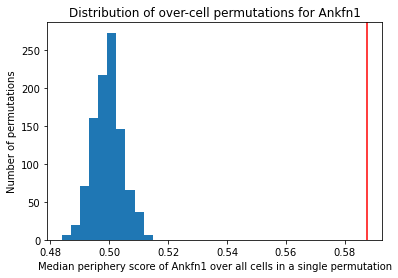

In [71]:
cell_by_perm_df.median().plot.hist()
plt.axvline(obs_periph_score.values[0],color='red')
plt.title('Distribution of over-cell permutations for {}'.format(gene))
plt.xlabel('Median periphery score of {} over all cells in a single permutation'.format(gene))
plt.ylabel('Number of permutations')
plt.show()
plt.close()

In [59]:
per_cell_obs_periph_score = pd.read_csv('../processed_data/20210127_q90_cell_gene_med_norm_ranks.csv')
per_cell_obs_periph_score.shape

(2707812, 4)

In [72]:
gene_per_cell_obs = per_cell_obs_periph_score[per_cell_obs_periph_score['target_molecule_name'].eq(gene)]
gene_per_cell_obs

,cell_id,target_molecule_name,normalized_rank,clust_id
549,100070027782195876079415879748834848836,Ankfn1,0.319277,9
971,100120630789554574689109334609716249164,Ankfn1,0.726174,14
1189,100161267474034229529523378768613166971,Ankfn1,0.510710,9
1647,100251347266379765782253014794912108486,Ankfn1,0.133583,4
2586,100333151675726512762263903895381259981,Ankfn1,0.396887,12
...,...,...,...,...
2704799,99723815948483903051720783428189545880,Ankfn1,0.257979,18
2706041,9982545706271537270090662292559777117,Ankfn1,0.803140,9
2706743,99891774657446095407384389422902105585,Ankfn1,0.619954,2
2706859,99894681416678054311268898690506545239,Ankfn1,0.764339,18


In [73]:
null_cells = cell_by_perm_df.index
obs_cells = gene_per_cell_obs['cell_id']
shared_cells = np.intersect1d(null_cells,obs_cells)
print(len(null_cells),len(obs_cells),len(shared_cells))

5514 5514 5514


236544133250884027596792000693618583801
3 991


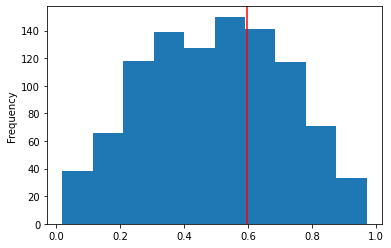

70362899224714468667476564221909416293
2 1214


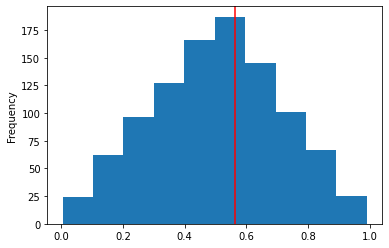

222731768422977059900227969363435857833
2 877


KeyboardInterrupt: 

In [74]:
for i in range(30):
    gene_per_cell_obs
    cell_id = cell_by_perm_df.index[i]
    print(cell_id)
    cell_query = spots_df['cell_id'].eq(cell_id)

    obs_score = gene_per_cell_obs[gene_per_cell_obs['cell_id'].eq(cell_id)]['normalized_rank'].values[0]
    
    num_gene_spots = spots_df[
        cell_query &
        spots_df['target_molecule_name'].eq(gene)
    ].shape[0]

    num_total_spots = spots_df[
        cell_query
    ].shape[0]

    print(num_gene_spots, num_total_spots)

    cell_by_perm_df.iloc[i].plot.hist()
    plt.axvline(obs_score,color='red')
    plt.show()
    plt.close()

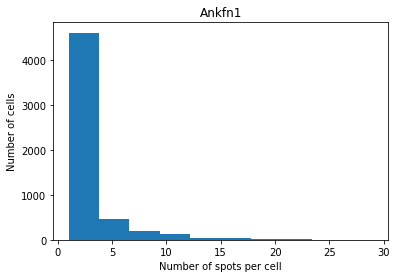

In [75]:
spots_df[spots_df['target_molecule_name'].eq(gene)].groupby('cell_id').size().plot.hist()
plt.title('{}'.format(gene))
plt.xlabel('Number of spots per cell')
plt.ylabel('Number of cells')
plt.show()
plt.close()

In [77]:
df = df.set_index('gene')
df.head(10)

,Cldn5,Col24a1,Blank-9,Camk2d,Plcxd3,Ankfn1,Blank-8,C1qtnf7,Egr2,Ikzf2,...,Marcksl1,Dscaml1,Vtn,Slc44a5,Tmtc2,Ccnb1,Cacng5,Blank-3,Fam84b,Fezf2
gene,,,,,,,,,,,,,,,,,,,,,
num_cells,3238.000000,6403.000000,4251.000000,19781.000000,14157.000000,5514.000000,5270.000000,1938.000000,10508.000000,10379.000000,...,13290.000000,19984.000000,7076.000000,9060.000000,15638.000000,4087.000000,8732.000000,3975.000000,12811.000000,13034.000000
real_Q25,0.109027,0.621071,0.357121,0.382998,0.343750,0.383723,0.309889,0.323393,0.439124,0.381283,...,0.297070,0.396678,0.226887,0.404934,0.348687,0.338986,0.323808,0.414308,0.345384,0.380055
real_Q50,0.345253,0.805838,0.621622,0.480506,0.492739,0.587525,0.557525,0.596202,0.659840,0.602165,...,0.429504,0.513833,0.477407,0.621212,0.544590,0.599781,0.512613,0.659731,0.516213,0.500000
real_Q75,0.660303,0.905948,0.831739,0.575935,0.636757,0.789254,0.795863,0.833018,0.832745,0.798409,...,0.547651,0.627884,0.720179,0.807268,0.723620,0.820092,0.701991,0.854632,0.673526,0.613082
overall_clusts_lt_count_Q25,0.000000,1000.000000,1000.000000,0.000000,0.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,0.000000,431.000000,0.000000,1000.000000,1000.000000,1000.000000,47.000000,1000.000000,121.000000,0.000000
overall_clusts_lt_count_Q50,0.000000,1000.000000,1000.000000,0.000000,1.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,0.000000,1000.000000,0.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,574.000000
overall_clusts_lt_count_Q75,0.000000,1000.000000,1000.000000,0.000000,59.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,0.000000,1000.000000,878.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
overall_clusts_Q25,0.306325,0.323705,0.262918,0.409314,0.357920,0.304409,0.266667,0.263368,0.296028,0.297960,...,0.382246,0.396938,0.284251,0.290672,0.324684,0.264222,0.330335,0.261452,0.348878,0.392960
overall_clusts_Q50,0.499831,0.499397,0.499337,0.499454,0.499444,0.499492,0.499456,0.499094,0.499483,0.499394,...,0.499443,0.499424,0.499371,0.499584,0.499439,0.499363,0.499362,0.499488,0.499401,0.499421


In [83]:
narrowness_check = df.loc[['real_Q50','overall_clusts_Q50','overall_clusts_lt_count_Q50']].T
narrowness_check

gene,real_Q50,overall_clusts_Q50,overall_clusts_lt_count_Q50
Cldn5,0.345253,0.499831,0.0
Col24a1,0.805838,0.499397,1000.0
Blank-9,0.621622,0.499337,1000.0
Camk2d,0.480506,0.499454,0.0
Plcxd3,0.492739,0.499444,1.0
...,...,...,...
Ccnb1,0.599781,0.499363,1000.0
Cacng5,0.512613,0.499362,1000.0
Blank-3,0.659731,0.499488,1000.0
Fam84b,0.516213,0.499401,1000.0


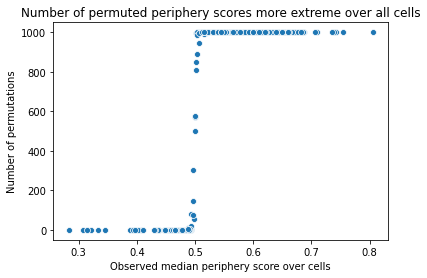

In [86]:
sns.scatterplot(
    x = 'real_Q50',
    y = 'overall_clusts_lt_count_Q50',
    data = narrowness_check,
)
plt.title('Number of permuted periphery scores more extreme over all cells')
plt.xlabel('Observed median periphery score over cells')
plt.ylabel('Number of permutations')
plt.show()
plt.close()

In [92]:
cells_df = pd.read_csv('../processed_data/q90_cells.csv')
cells_df.head()

,cell_id,boundaryX,boundaryY,slice_id,sample
0,102513782275574352391549636869222584212,"2097.1362953431903, 2097.1362953431903, 2097.1...","2346.248493306339, 2345.705993324518, 2345.163...",mouse2_slice10,mouse2sample2
1,198259986845326386185083518576166673028,"2106.141795041412, 2106.141795041412, 2106.141...","2328.9969938844442, 2328.4544939026237, 2327.9...",mouse2_slice10,mouse2sample2
2,202633430165103308157026102881717708611,"2058.727296630293, 2058.727296630293, 2058.727...","2228.8514972403646, 2228.308997258544, 2227.76...",mouse2_slice10,mouse2sample2
3,202866835269971649617924499544299592196,"2055.3637967430054, 2055.3637967430054, 2055.2...","2248.4899965822697, 2247.947496600449, 2247.51...",mouse2_slice10,mouse2sample2
4,21014129563353280159906900457364829387,"2096.1597953759133, 2096.1597953759133, 2096.0...","2310.4434945061803, 2309.9009945243597, 2309.4...",mouse2_slice10,mouse2sample2


In [95]:
sub_cell_ids = spots_df[spots_df['target_molecule_name'].eq('Ankfn1')]['cell_id'].unique()
sub_spots = spots_df[spots_df['cell_id'].isin(sub_cell_ids)]
sub_cells = cells_df[cells_df['cell_id'].isin(sub_cell_ids)]

In [99]:
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("Ankfn1.pdf")

plots = plot_utils.plot_spot_cells(sub_spots,sub_cells,spot_colors={'Ankfn1':'red'})
for i,(fig,ax) in enumerate(plots):
    pdf.savefig(fig)
    plt.close()
    if i > 100:
        break
        
pdf.close()

../scripts/plot_utils.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,8))


In [144]:
obs_periph_scores[obs_periph_scores['target_molecule_name'].eq('ankfn1')]

,target_molecule_name,normalized_rank,symbol,ENSG,description,refseq
175,ankfn1,0.587525,ankfn1,ENSG00000153930,ankyrin repeat and fibronectin type III domain...,NaN


In [146]:
df['Ankfn1'].head(10)

gene
num_cells                      5514.000000
real_Q25                          0.383723
real_Q50                          0.587525
real_Q75                          0.789254
overall_clusts_lt_count_Q25    1000.000000
overall_clusts_lt_count_Q50    1000.000000
overall_clusts_lt_count_Q75    1000.000000
overall_clusts_Q25                0.304409
overall_clusts_Q50                0.499492
overall_clusts_Q75                0.694633
Name: Ankfn1, dtype: float64

In [157]:
list(df.index)

['num_cells',
 'real_Q25',
 'real_Q50',
 'real_Q75',
 'overall_clusts_lt_count_Q25',
 'overall_clusts_lt_count_Q50',
 'overall_clusts_lt_count_Q75',
 'overall_clusts_Q25',
 'overall_clusts_Q50',
 'overall_clusts_Q75',
 'clust_0_cell_count',
 'clust_0_lt_count_Q25',
 'clust_0_lt_count_Q50',
 'clust_0_lt_count_Q75',
 'clust_0_Q25',
 'clust_0_Q50',
 'clust_0_Q75',
 'clust_1_cell_count',
 'clust_1_lt_count_Q25',
 'clust_1_lt_count_Q50',
 'clust_1_lt_count_Q75',
 'clust_1_Q25',
 'clust_1_Q50',
 'clust_1_Q75',
 'clust_2_cell_count',
 'clust_2_lt_count_Q25',
 'clust_2_lt_count_Q50',
 'clust_2_lt_count_Q75',
 'clust_2_Q25',
 'clust_2_Q50',
 'clust_2_Q75',
 'clust_3_cell_count',
 'clust_3_lt_count_Q25',
 'clust_3_lt_count_Q50',
 'clust_3_lt_count_Q75',
 'clust_3_Q25',
 'clust_3_Q50',
 'clust_3_Q75',
 'clust_4_cell_count',
 'clust_4_lt_count_Q25',
 'clust_4_lt_count_Q50',
 'clust_4_lt_count_Q75',
 'clust_4_Q25',
 'clust_4_Q50',
 'clust_4_Q75',
 'clust_5_cell_count',
 'clust_5_lt_count_Q25',
 'cl

,target_molecule_name,normalized_rank,symbol,ENSG,description,refseq
0,cxcl14,0.282680,cxcl14,ENSG00000145824,C-X-C motif chemokine ligand 14 (from HGNC CXC...,NaN
1,gfap,0.307045,gfap,ENSG00000131095,Homo sapiens glial fibrillary acidic protein (...,NM_002055
2,flt1,0.314840,flt1,ENSG00000102755,fms related tyrosine kinase 1 (from HGNC FLT1),NaN
3,timp3,0.321353,timp3,ENSG00000100234,Homo sapiens TIMP metallopeptidase inhibitor 3...,NM_000362
4,aqp4,0.333333,aqp4,ENSG00000171885,Forms a water-specific channel. Osmoreceptor w...,NaN
...,...,...,...,...,...,...
222,col14a1,0.706638,col14a1,ENSG00000187955,The sequence shown here is derived from an Ens...,NaN
223,chrna2,0.739055,chrna2,ENSG00000120903,cholinergic receptor nicotinic alpha 2 subunit...,NaN
224,corin,0.742479,corin,ENSG00000145244,"Homo sapiens corin, serine peptidase (CORIN), ...",NM_001278585
225,col15a1,0.753676,col15a1,ENSG00000204291,collagen type XV alpha 1 chain (from HGNC COL1...,NaN


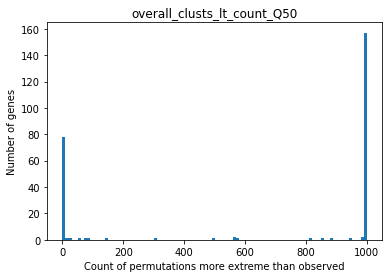

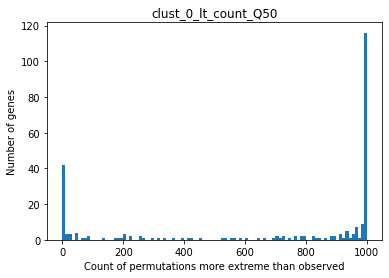

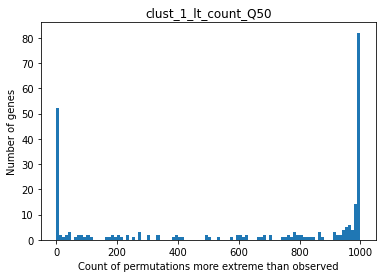

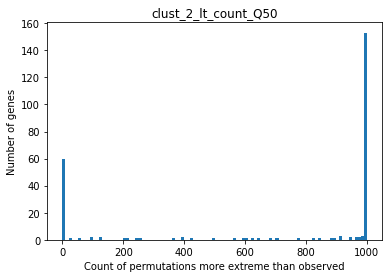

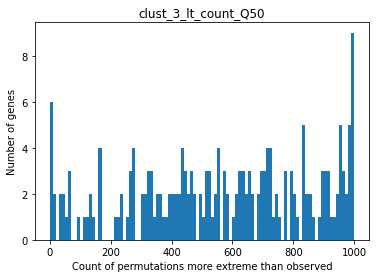

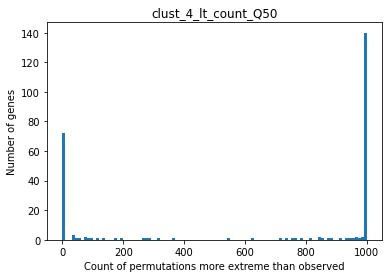

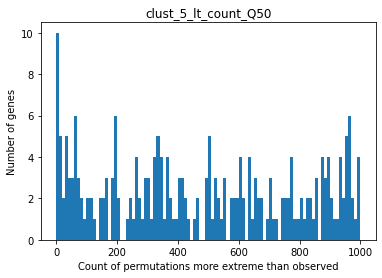

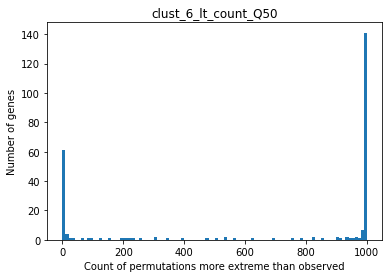

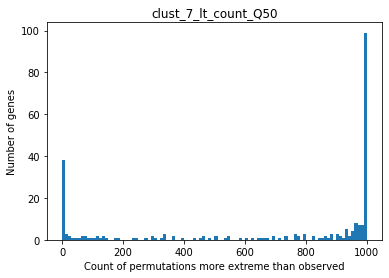

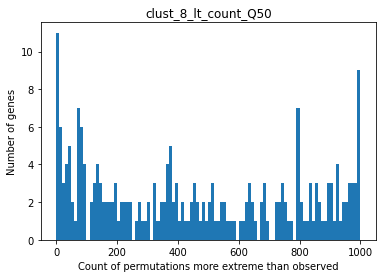

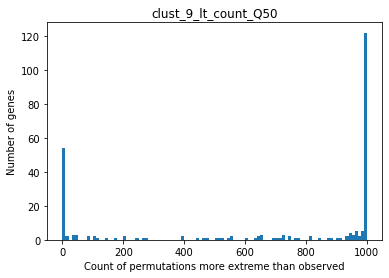

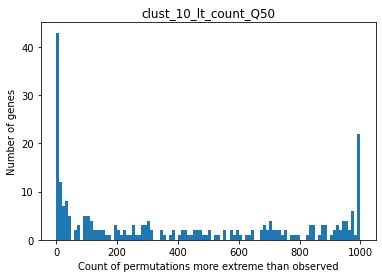

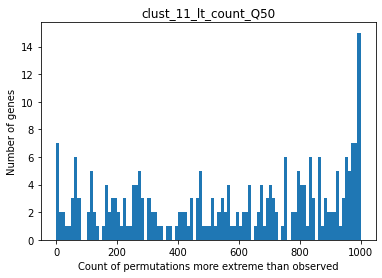

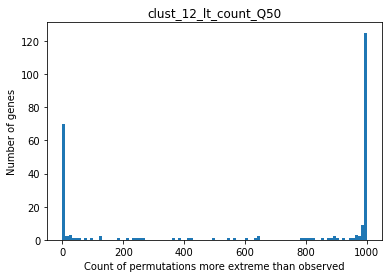

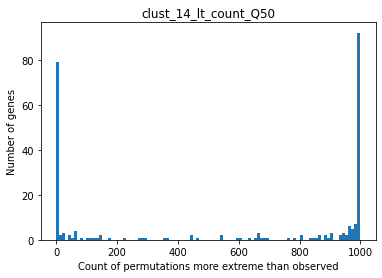

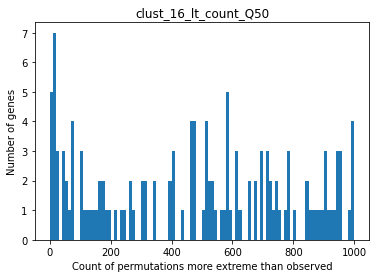

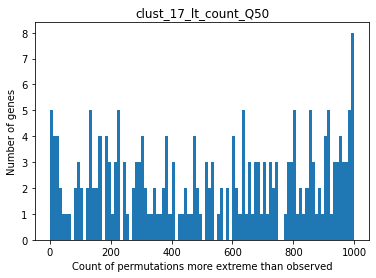

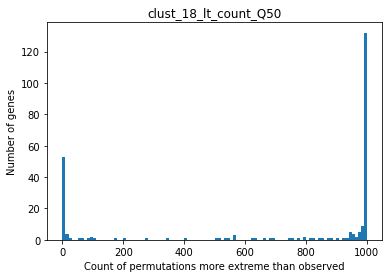

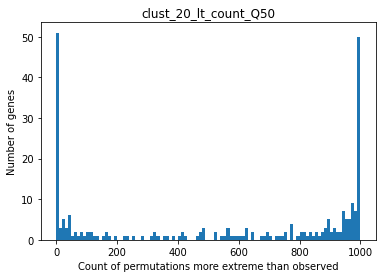

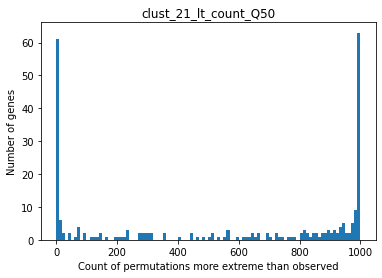

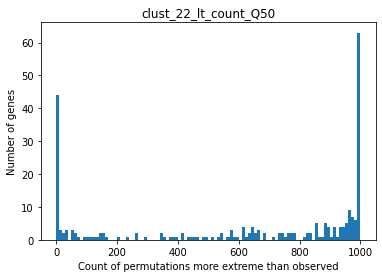

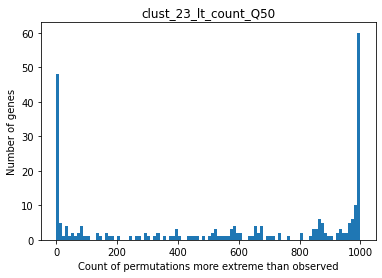

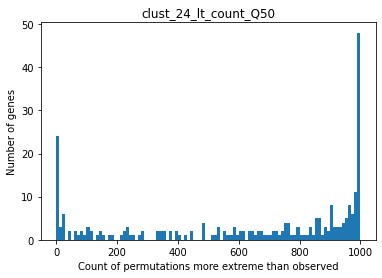

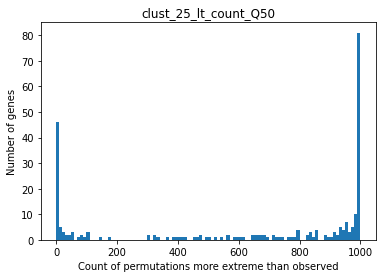

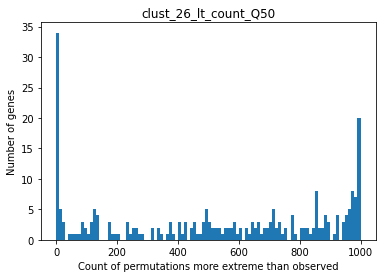

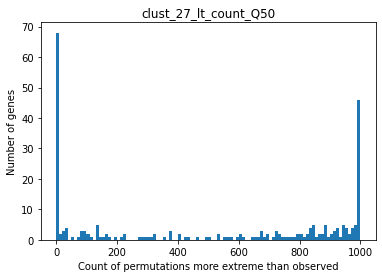

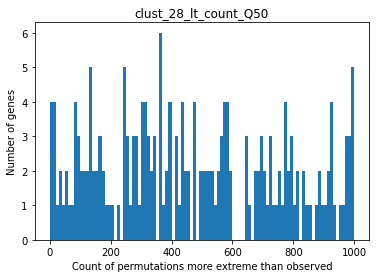

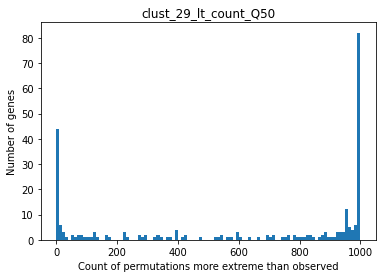

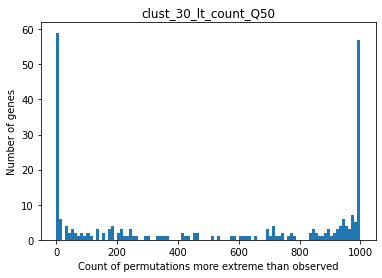

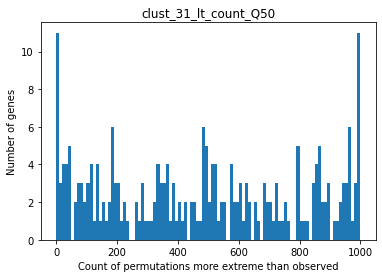

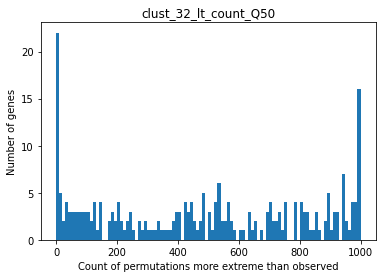

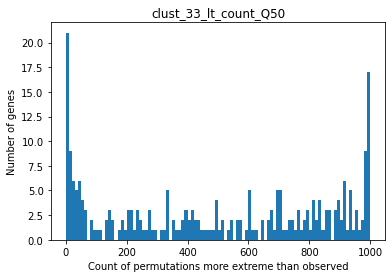

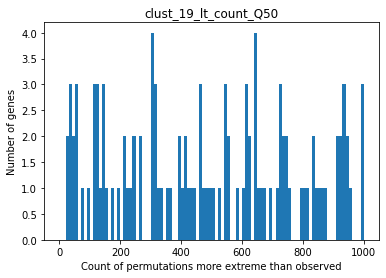

In [167]:
for col in [c for c in df.index if '_lt_count_Q50' in c]:
    df.loc[col].plot.hist(bins=np.arange(0,1010,10))
    plt.title('{}'.format(col))
    plt.xlabel('Count of permutations more extreme than observed')
    plt.ylabel('Number of genes')
    plt.show()
    plt.close()


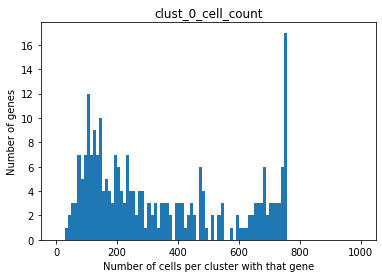

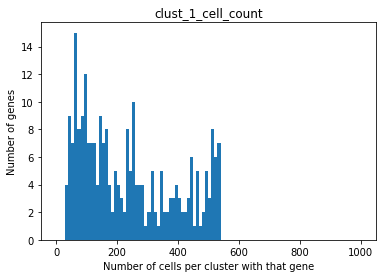

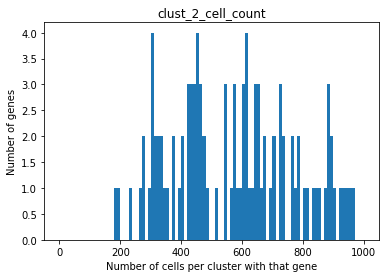

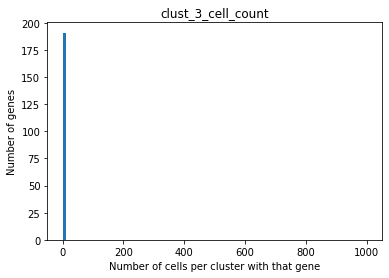

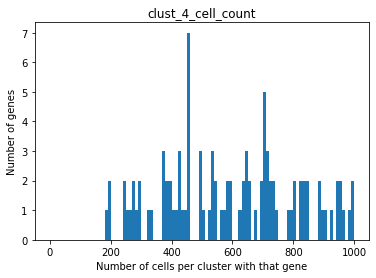

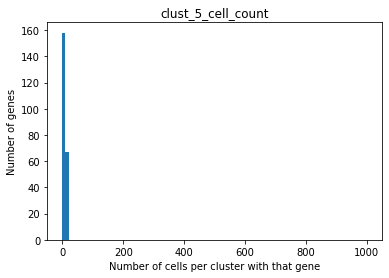

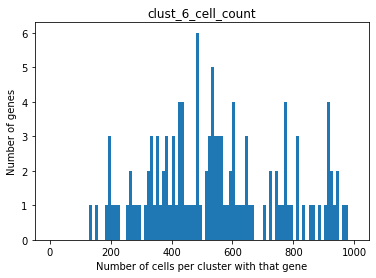

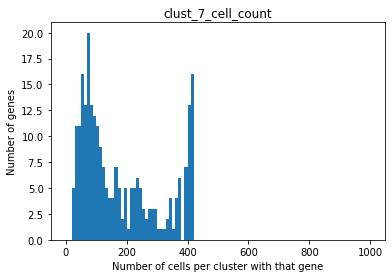

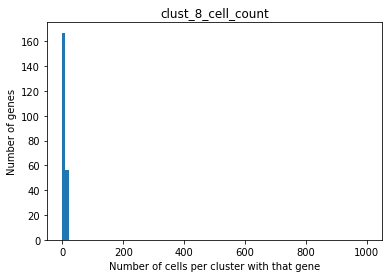

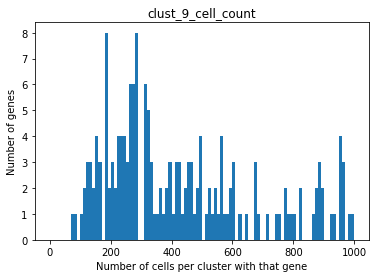

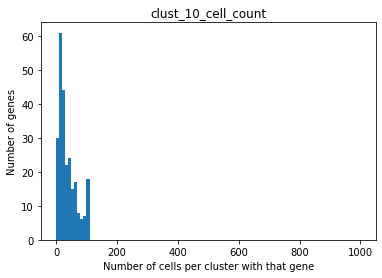

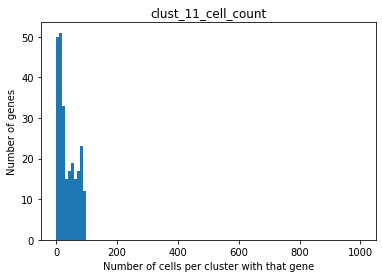

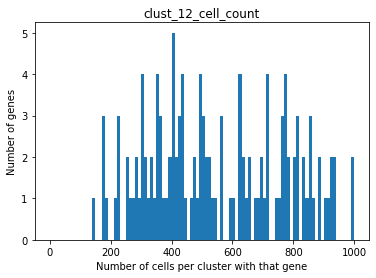

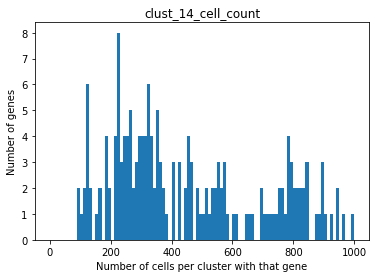

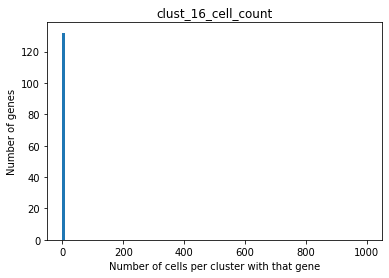

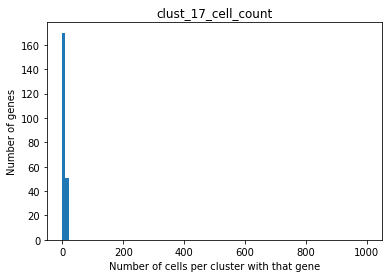

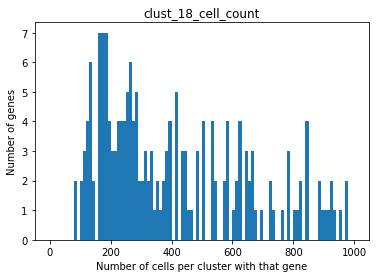

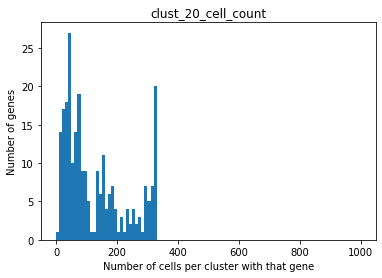

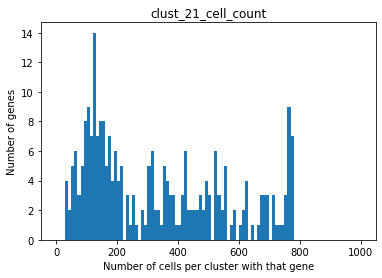

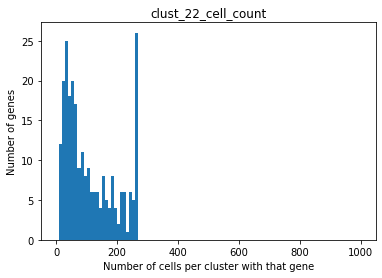

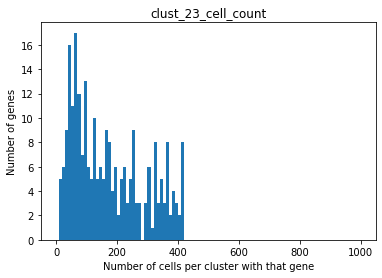

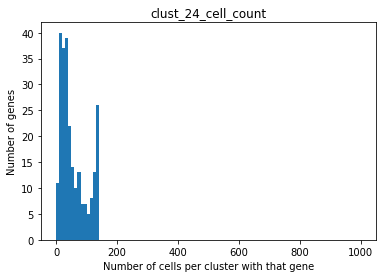

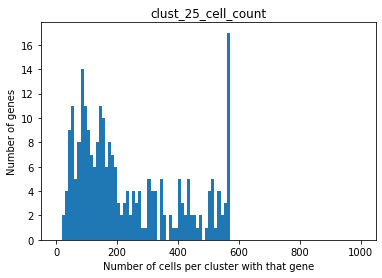

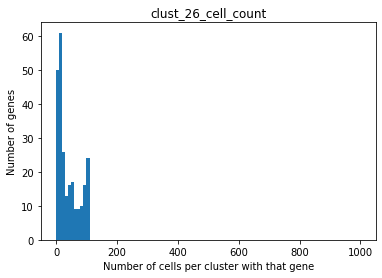

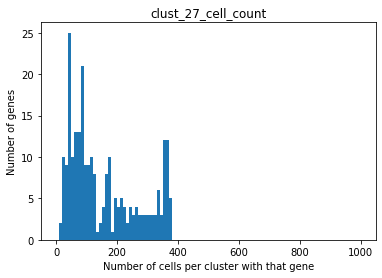

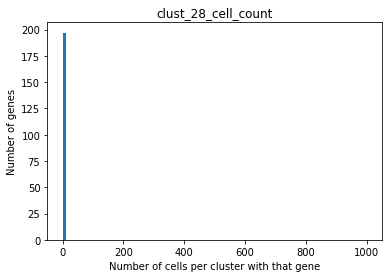

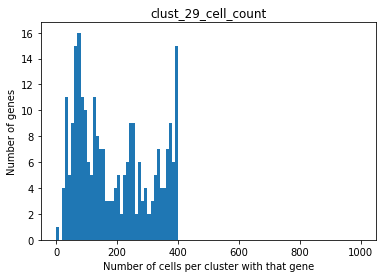

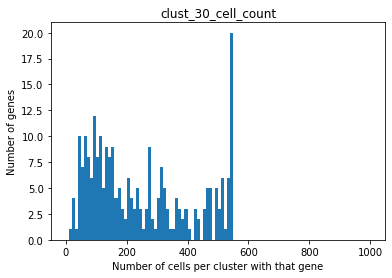

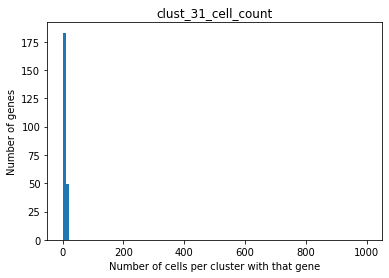

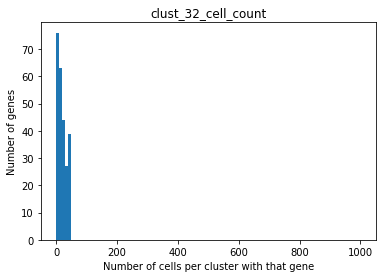

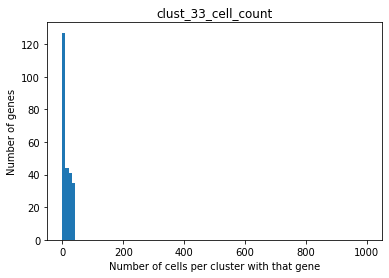

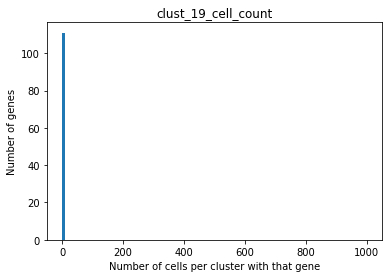

In [176]:
for col in [c for c in df.index if 'cell_count' in c]:
    df.loc[col].plot.hist(bins=np.arange(0,1010,10))
    plt.title('{}'.format(col))
    plt.xlabel('Number of cells per cluster with that gene')
    plt.ylabel('Number of genes')
    plt.show()
    plt.close()


# Calculating observed per-cluster periphery scores

In [160]:
q90_df.head()

,global_x,global_y,global_z,target_molecule_name,num_assigned_cells,cell_id,sample,min_boundary_dist,clust_id,rank,cell_spot_num,normalized_rank
0,-4237.7397,1681.8490,0.0,Acta2,1,217951229059897556843731256135790480948,mouse1sample2,4.981020,2,1128.0,1256.0,0.898089
1,-4215.4233,1699.2443,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2,1.670875,2,502.0,1216.0,0.412829
2,-4207.3945,1706.8620,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2,5.015634,2,1144.0,1216.0,0.940789
3,-4206.7200,1711.7010,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2,0.636409,2,151.0,1216.0,0.124178
4,-4270.8410,1726.0154,0.0,Acta2,1,29559620824861669263446897425219499530,mouse1sample2,3.183747,2,686.0,852.0,0.805164


In [185]:
q90_df['gene_spot_num'] = q90_df.groupby(['cell_id','target_molecule_name'])['cell_id'].transform('count')
q90_df.head()

,global_x,global_y,global_z,target_molecule_name,num_assigned_cells,cell_id,sample,min_boundary_dist,clust_id,rank,cell_spot_num,normalized_rank,gene_spot_num
0,-4237.7397,1681.8490,0.0,Acta2,1,217951229059897556843731256135790480948,mouse1sample2,4.981020,2,1128.0,1256.0,0.898089,4
1,-4215.4233,1699.2443,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2,1.670875,2,502.0,1216.0,0.412829,4
2,-4207.3945,1706.8620,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2,5.015634,2,1144.0,1216.0,0.940789,4
3,-4206.7200,1711.7010,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2,0.636409,2,151.0,1216.0,0.124178,4
4,-4270.8410,1726.0154,0.0,Acta2,1,29559620824861669263446897425219499530,mouse1sample2,3.183747,2,686.0,852.0,0.805164,3


In [191]:
per_clust_gene_obs = (
    q90_df.groupby(['clust_id','target_molecule_name'])
    .agg(
        num_cells = ('cell_id', lambda g: g.unique().size),
        median_cluster_periph = ('normalized_rank', 'median'),
        median_spots_per_cell = ('gene_spot_num', 'median')
    )
    .reset_index()
)
per_clust_gene_obs.head()

,clust_id,target_molecule_name,num_cells,median_cluster_periph,median_spots_per_cell
0,0,1700022I11Rik,68,0.634946,1.0
1,0,1810046K07Rik,275,0.712142,1.0
2,0,5031425F14Rik,106,0.710038,1.0
3,0,5730522E02Rik,167,0.702632,1.0
4,0,Acta2,593,0.431034,3.0


In [193]:
per_clust_gene_obs[
    per_clust_gene_obs['num_cells'].ge(10)
].sort_values('median_cluster_periph')

,clust_id,target_molecule_name,num_cells,median_cluster_periph,median_spots_per_cell
4692,22,Cldn5,25,0.102804,4.0
7172,32,Gfap,23,0.115897,7.0
7086,32,Aqp4,26,0.150463,3.0
1770,7,Flt1,87,0.161000,5.0
7303,32,Timp3,28,0.163395,4.0
...,...,...,...,...,...
1833,7,Osr1,47,0.836623,1.0
5455,25,Col24a1,193,0.840244,12.0
6659,30,Col24a1,519,0.846235,20.0
1015,4,Col24a1,1368,0.855643,9.0


In [226]:
cell_ids = q90_df[q90_df['target_molecule_name'].eq('Col24a1') & q90_df['clust_id'].eq(4)]['cell_id'].unique()
sub_spots = spots_df[spots_df['cell_id'].isin(cell_ids)]
sub_cells = cells_df[cells_df['cell_id'].isin(cell_ids)]

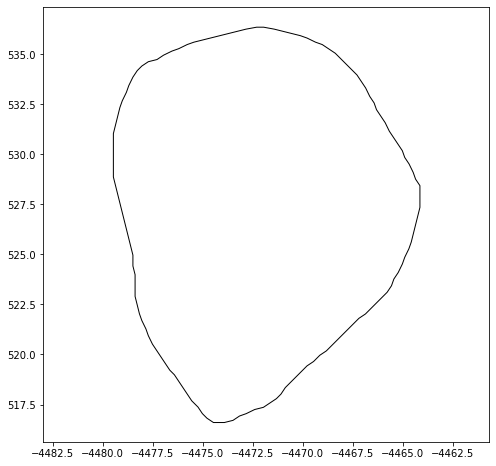

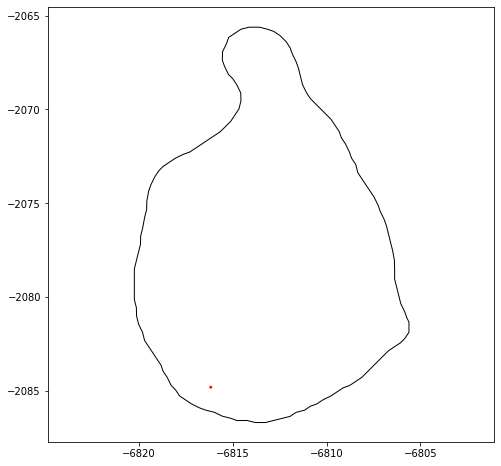

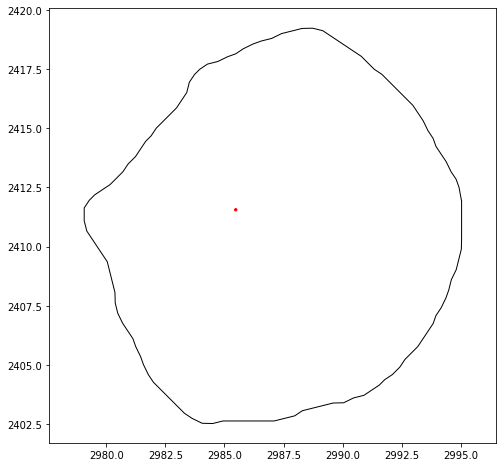

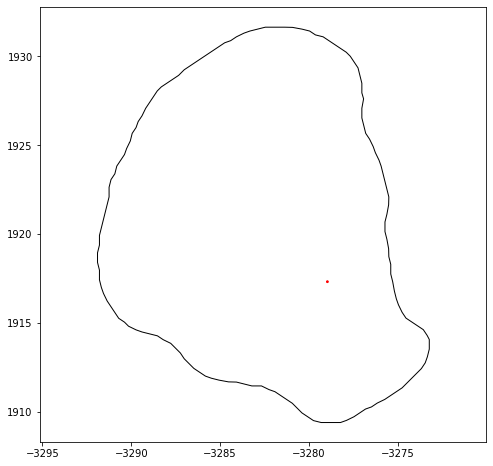

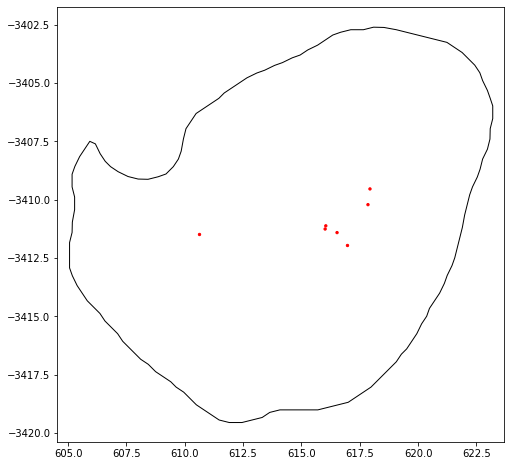

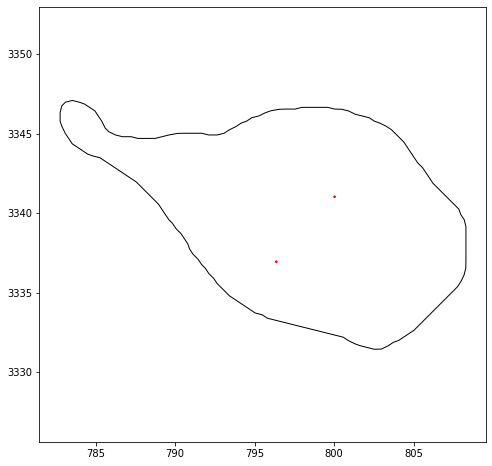

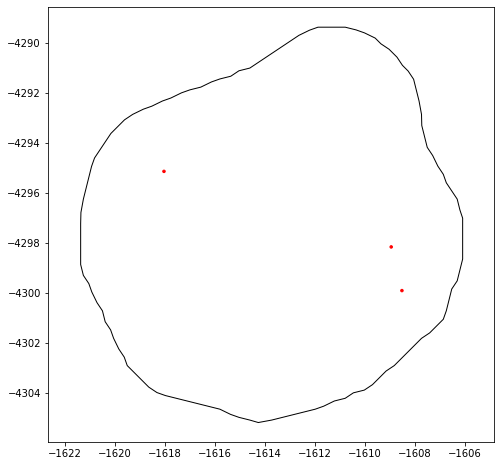

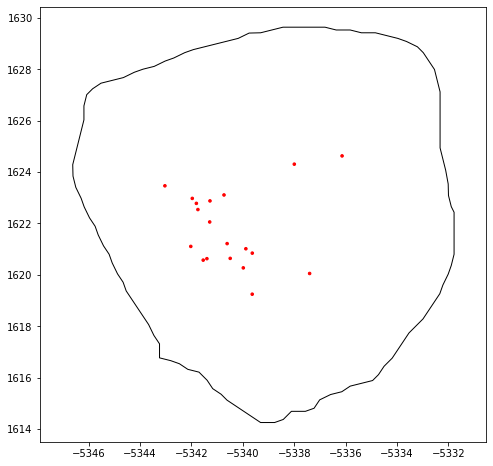

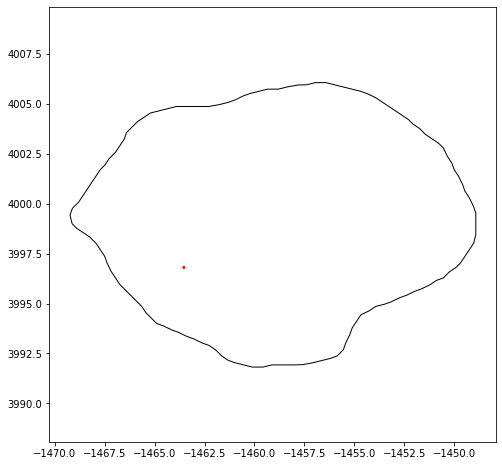

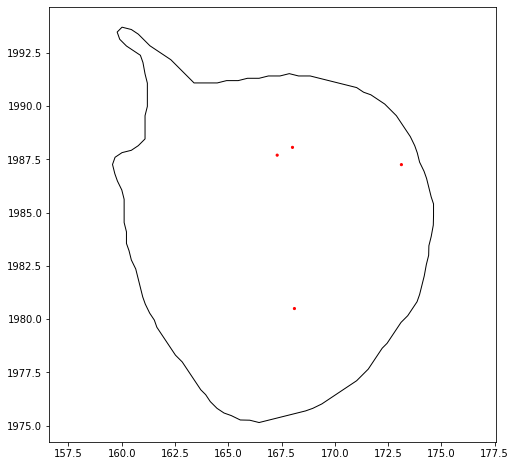

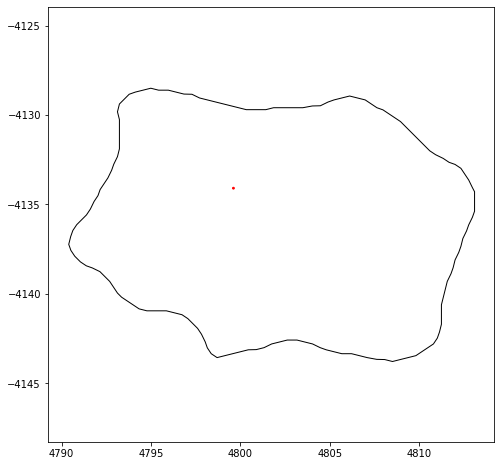

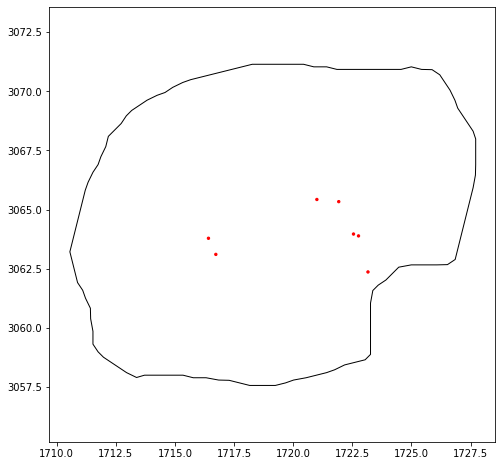

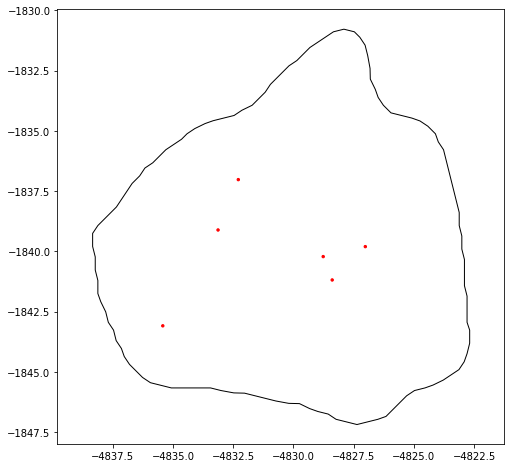

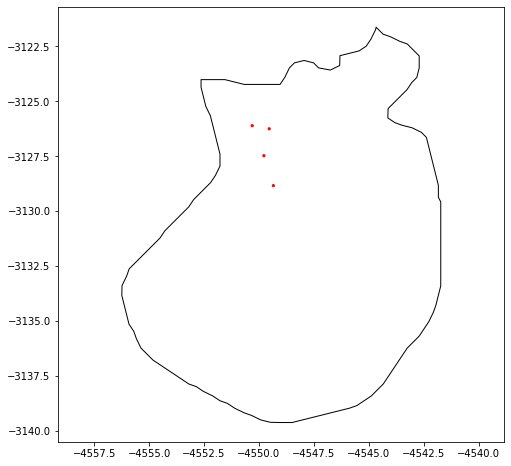

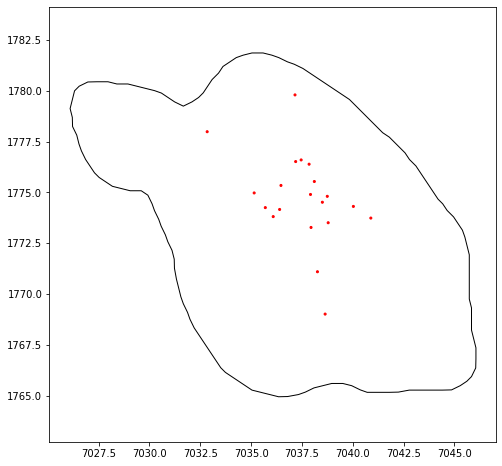

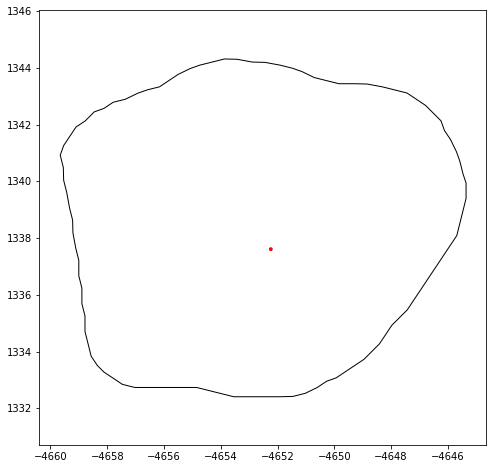

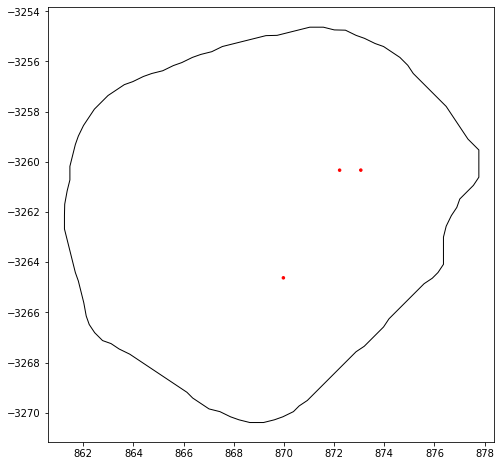

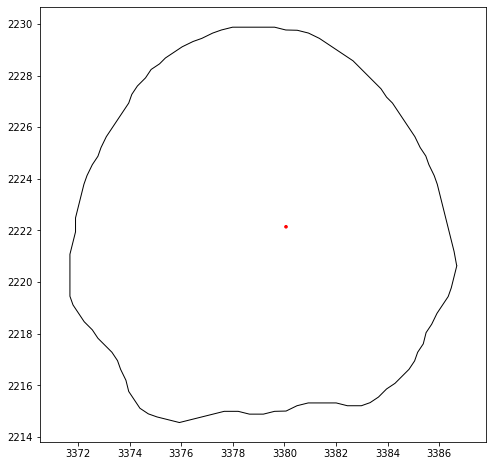

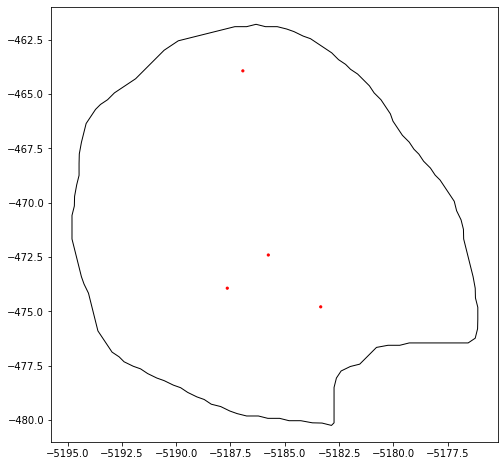

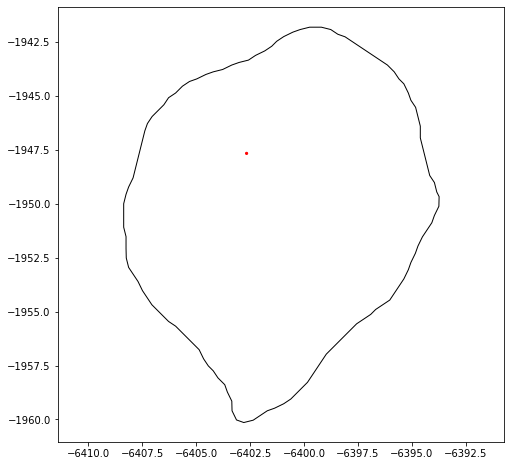

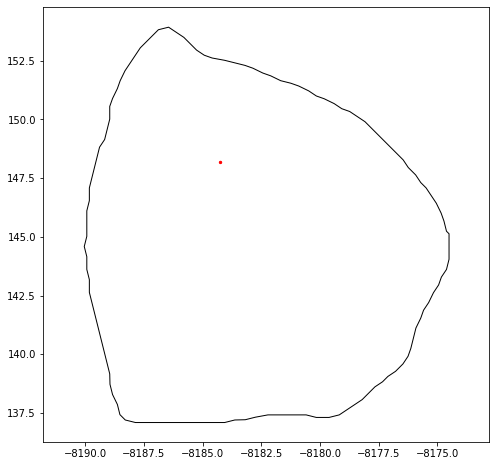

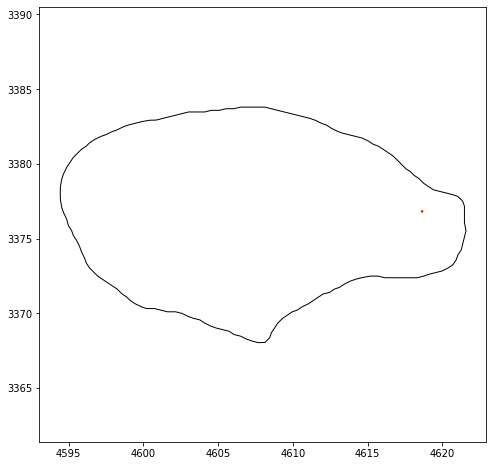

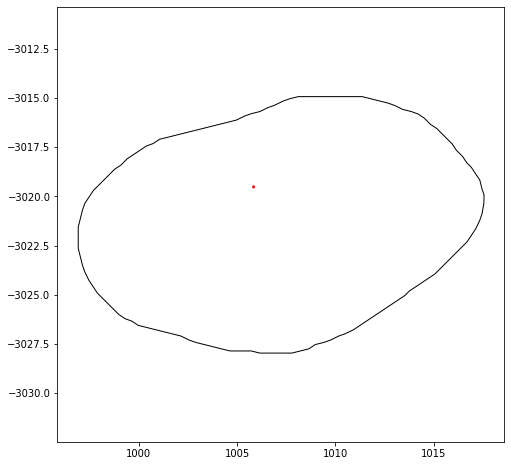

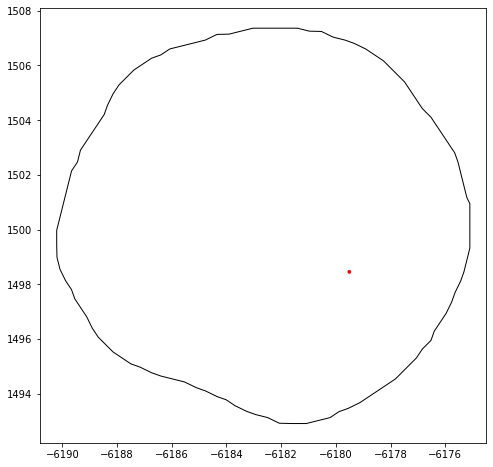

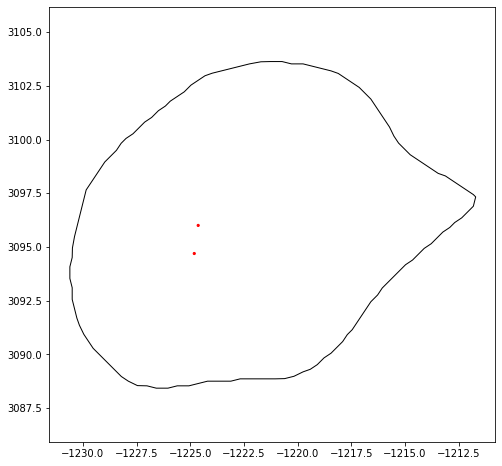

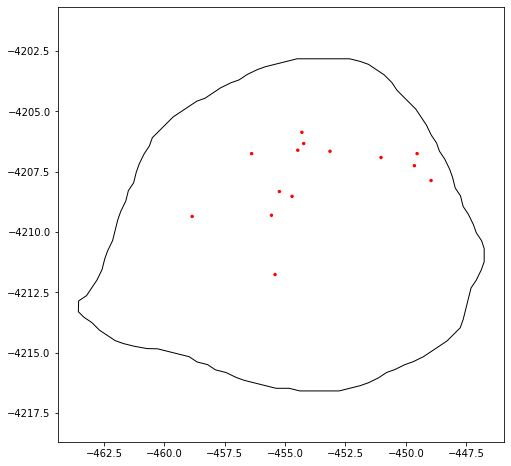

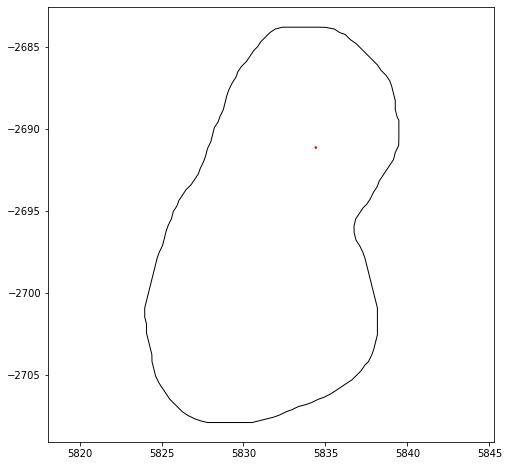

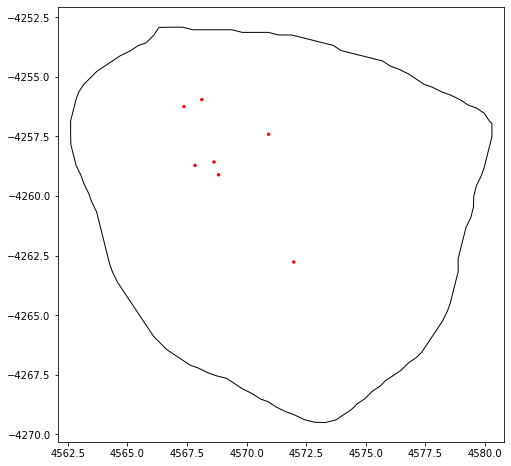

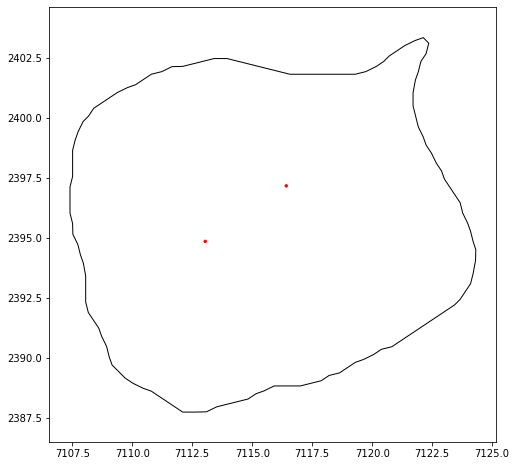

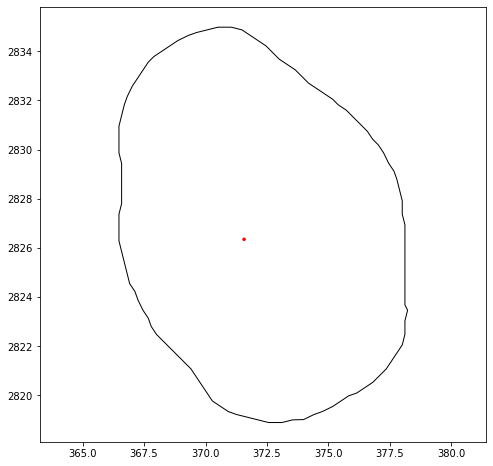

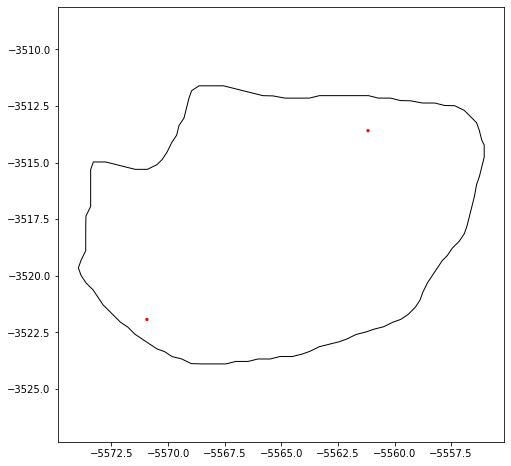

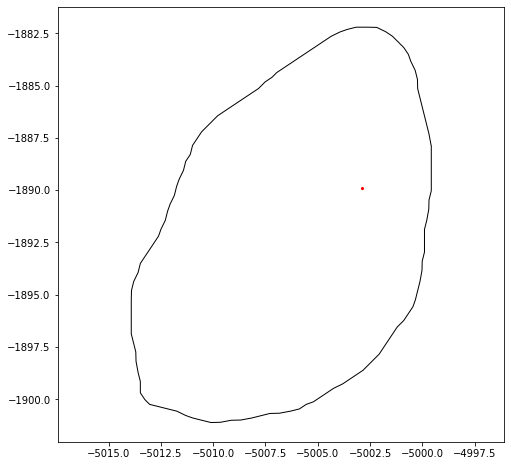

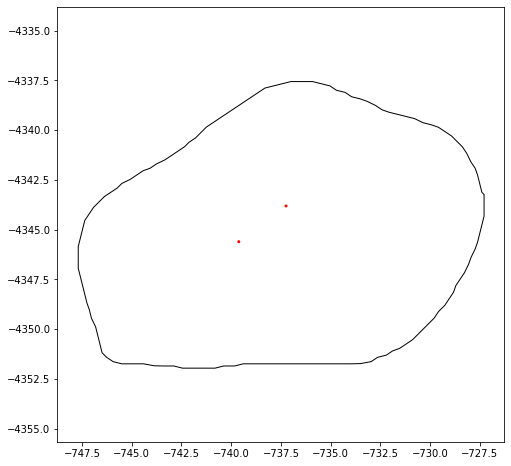

KeyboardInterrupt: 

In [225]:
plots = plot_utils.plot_spot_cells(sub_spots,sub_cells,spot_colors={'Col24a1':'red'})
for i,(fig,ax) in enumerate(plots):
    plt.show(fig)
    plt.close()


# Checking small amount of cells and permutations to make sure there are no errors

In [148]:
q90_df = pd.read_csv('../processed_data/q90_min_periph_dists.csv')
q90_df.head()

,global_x,global_y,global_z,target_molecule_name,num_assigned_cells,cell_id,sample,min_boundary_dist,clust_id,rank,cell_spot_num,normalized_rank
0,-4237.7397,1681.8490,0.0,Acta2,1,217951229059897556843731256135790480948,mouse1sample2,4.981020,2,1128.0,1256.0,0.898089
1,-4215.4233,1699.2443,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2,1.670875,2,502.0,1216.0,0.412829
2,-4207.3945,1706.8620,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2,5.015634,2,1144.0,1216.0,0.940789
3,-4206.7200,1711.7010,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2,0.636409,2,151.0,1216.0,0.124178
4,-4270.8410,1726.0154,0.0,Acta2,1,29559620824861669263446897425219499530,mouse1sample2,3.183747,2,686.0,852.0,0.805164


In [154]:
#This is the function I'm using to make the permutations for a specific gene over all cells
#Edited to have only 10 cells and 5 permutations
def matrix_approach(test_df,gene_name):
    
    max_cells = 10
    max_perms = 5
    
    cells = test_df[test_df['target_molecule_name'].eq(gene_name)]['cell_id'].unique()[:max_cells]

    test_df = test_df[test_df['cell_id'].isin(cells)]

    cell_spot_counts = test_df.groupby('cell_id').size()
    cell_gene_spot_counts = test_df[test_df['target_molecule_name'].eq(gene_name)].groupby(['cell_id']).size()

    num_cells = cells.size
    num_its = min(max_perms,1000)

    ret_df = np.zeros((num_cells, num_its))
    ret_df[:,:] = np.NaN

    for i,cell in enumerate(cells):

        rand_ranks = np.random.choice(
            cell_spot_counts[cell],
            (num_its, cell_gene_spot_counts[cell])
        )/cell_spot_counts[cell]

        print(rand_ranks)
        print(cell_gene_spot_counts[cell],cell_spot_counts[cell])
        ret_df[i,:] = np.median(rand_ranks, axis=1)

    ret_df = pd.DataFrame(ret_df)
    ret_df.index = cells
    return ret_df

ret_df = matrix_approach(q90_df,'Ankfn1')
ret_df.head()

[[0.61150353 0.59737639 0.50554995]
 [0.75378406 0.68213925 0.1493441 ]
 [0.14026236 0.65388496 0.43188698]
 [0.43592331 0.74974773 0.80928355]
 [0.86074672 0.75378406 0.80221998]]
3 991
[[0.24711697 0.54200988]
 [0.30724876 0.592257  ]
 [0.02224053 0.36738056]
 [0.97034596 0.90939044]
 [0.09719934 0.66144975]]
2 1214
[[0.7981756  0.39566705]
 [0.27023945 0.4640821 ]
 [0.94868871 0.77080958]
 [0.31470924 0.32839225]
 [0.41049031 0.39338655]]
2 877
[[0.85873192 0.06006674]
 [0.79532814 0.95216908]
 [0.6429366  0.45494994]
 [0.73081201 0.40934372]
 [0.19577308 0.14905451]]
2 899
[[0.25161812]
 [0.70145631]
 [0.77993528]
 [0.25566343]
 [0.9368932 ]]
1 1236
[[0.53286385]
 [0.94366197]
 [0.77464789]
 [0.92253521]
 [0.47183099]]
1 852
[[0.56316916]
 [0.13490364]
 [0.14668094]
 [0.83083512]
 [0.01391863]]
1 934
[[0.8624052 ]
 [0.8624052 ]
 [0.28060672]
 [0.86023835]
 [0.2751896 ]]
1 923
[[0.84813084]
 [0.60981308]
 [0.80023364]
 [0.92056075]
 [0.96728972]]
1 856
[[0.68020305 0.05668359 0.7732

,0,1,2,3,4
236544133250884027596792000693618583801,0.597376,0.682139,0.431887,0.749748,0.802220
70362899224714468667476564221909416293,0.394563,0.449753,0.194811,0.939868,0.379325
222731768422977059900227969363435857833,0.596921,0.367161,0.859749,0.321551,0.401938
331521026655800010206889807963799816539,0.459399,0.873749,0.548943,0.570078,0.172414
176780761113989476793326908988017754633,0.251618,0.701456,0.779935,0.255663,0.936893
